In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("adult_data.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' salary'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.shape

(32561, 15)

In [6]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<Axes: xlabel=' salary', ylabel='count'>

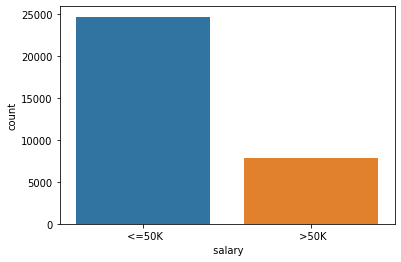

In [7]:
sns.countplot(x=' salary',data=df)

In [8]:
df[" salary"].value_counts()

 <=50K    24720
 >50K      7841
Name:  salary, dtype: int64

In [9]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 salary            0
dtype: int64

In [10]:
numerical=[i for i in df.columns if df[i].dtypes !="0"]

In [11]:
for i in numerical:
  print(f"{i} : {len(df[i].unique())}")

age : 73
 workclass : 9
 fnlwgt : 21648
 education : 16
 education-num : 16
 marital-status : 7
 occupation : 15
 relationship : 6
 race : 5
 sex : 2
 capital-gain : 119
 capital-loss : 92
 hours-per-week : 94
 native-country : 42
 salary : 2


In [12]:
df[" salary"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [13]:
categorical =[i for i in df.columns if df[i].dtypes=="0"]

In [14]:
for feature in categorical:
  print(f"{feature} : {len(df[feature].unique())}")

In [15]:
for feature in categorical:
  print(df[feature].value_counts())
  print("\n \n")

<Axes: >

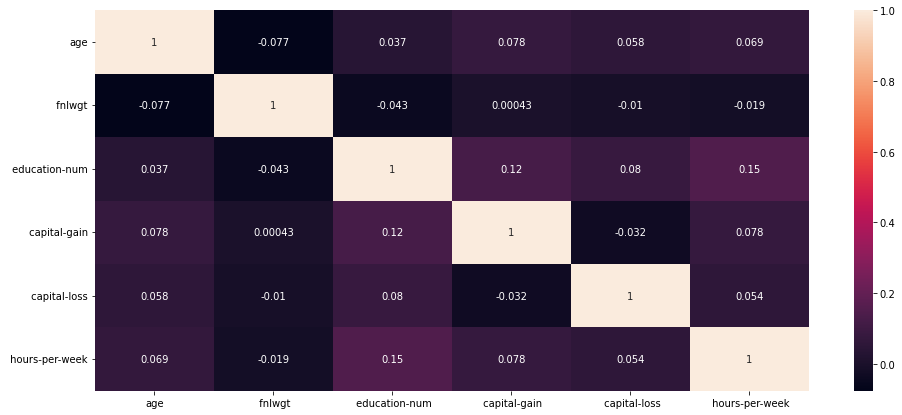

In [16]:
plt.figure(figsize=(16,7))
sns.heatmap(df.corr(),annot=True)

In [17]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder


In [18]:
df=df.apply(LabelEncoder().fit_transform)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39,0
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5,0


In [19]:
X_train = df.iloc[:,:-1]
y_train = df[" salary"]

In [20]:
df_test=pd.read_csv("adult_test.csv")
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [21]:
df_test["age"] = np.log(df_test["age"])



df_test = df_test.apply(LabelEncoder().fit_transform)

In [22]:
X_train=df.iloc[:,:-1]
y_train=df[" salary"]

In [23]:
X_test=df_test.iloc[:,:-1]
y_test=df_test[" salary"]

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [25]:
from sklearn.metrics import confusion_matrix ,classification_report,accuracy_score

In [26]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(class_weight="balanced")
lr.fit(X_train,y_train)
prediction=lr.predict(X_test)
accuracy_score(y_test,prediction)

0.7675204225784656

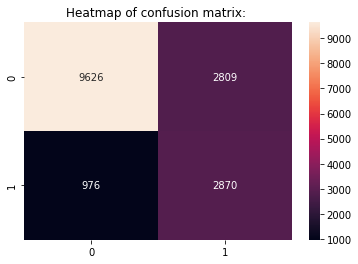

In [27]:
cm=confusion_matrix(y_test,prediction)
plt.title('Heatmap of confusion matrix: ',fontsize=12)
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [28]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.91      0.77      0.84     12435
           1       0.51      0.75      0.60      3846

    accuracy                           0.77     16281
   macro avg       0.71      0.76      0.72     16281
weighted avg       0.81      0.77      0.78     16281



In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=51)
rf_classifier.fit(X_train,y_train)
y_pred=rf_classifier.predict(X_test)
accuracy_score(y_test,y_pred)

0.8452183526810393

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     12435
           1       0.73      0.55      0.63      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.74      0.76     16281
weighted avg       0.84      0.85      0.84     16281



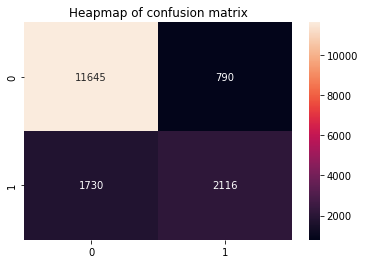

In [31]:
cm=confusion_matrix(y_test,y_pred)
plt.title('Heapmap of confusion matrix',fontsize=12)
sns.heatmap(cm,annot=True,fmt="d")
plt.show()